<a href="https://colab.research.google.com/github/MakhoninaAV/prog1kurs/blob/main/%D0%9B_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Построение BST из элементов: [22, 11, 28, 9, 15, 25, 30]
Текущий узел: 22
Вставлен новый узел: 11
Текущий узел: 22
Вставлен новый узел: 28
Текущий узел: 22
Текущий узел: 11
Вставлен новый узел: 9
Текущий узел: 22
Текущий узел: 11
Вставлен новый узел: 15
Текущий узел: 22
Текущий узел: 28
Вставлен новый узел: 25
Текущий узел: 22
Текущий узел: 28
Вставлен новый узел: 30

2. Поиск элемента 28:
Поиск: проверяем узел 22
Поиск: проверяем узел 28
Узел 28 найден!

3. Удаление элемента 11:
Поиск: проверяем узел 22
Поиск: проверяем узел 11
Узел 11 найден!
Удален узел 11, заменен на 15

4. Сортировка массива с помощью Heapsort:
Исходный массив: [22, 11, 28, 9, 15, 25, 30]
Отсортированный массив: [9, 11, 15, 22, 25, 28, 30]


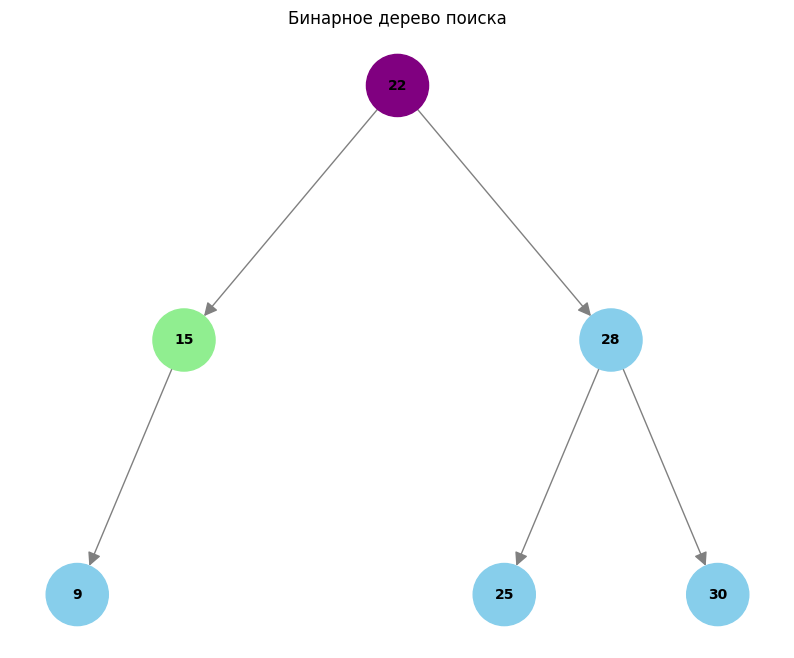

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt #визуал данных
import time
from collections import deque #двусторонняя очередь. эффективно добавляtn и удаляtn элементы с обоих концов

class TreeNode:  # узел бин дер, каждый узел со значением val
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):   # метод возвращает строковое представление узла
        return f"Node({self.val})"

class BSTVisualizer:   # класс визуализации бинарного поиска
    def __init__(self):
        self.graph = nx.DiGraph()  # граф для представления дерева
        self.pos = {}              # словарь для хранрения позиций узлов на графике
        self.fig, self.ax = plt.subplots(figsize=(10, 8)) # объекты для создания графика с заданными параметрами
        plt.ion()  # интерактивный режим для обновления графиков в реальном времени
        self.root_node = None  # корень дерева, иниц none

    def _get_tree_positions(self, node, x, y, level_width): #вычисляет орекурсивно позиции узлов дер для визуал
        if node is not None:                                #координаты узла, ширина уровня узла дерева
            self.pos[node.val] = (x, y) #позиция узла добавляется в словарь + рекурсивный метод для левого и правого поддерева
            if node.left:
                self._get_tree_positions(node.left, x - level_width/2, y - 1, level_width/2)
            if node.right:
                self._get_tree_positions(node.right, x + level_width/2, y - 1, level_width/2)

    def update_graph(self, root, highlight_val=None, parent_val=None, inserted_val=None): # очищение текущего графа и обновление на основе переданного корня дерева
        self.ax.clear()
        self.graph.clear()

        if root is None:
            self.ax.set_title("Пустое дерево")
            self.fig.canvas.draw_idle()
            self.fig.canvas.flush_events()
            return

        nodes_to_process = deque([root]) # очередь deque для обхода дерева в ширину
        while nodes_to_process:
            node = nodes_to_process.popleft()    #каждый узел добавляется в граф
            self.graph.add_node(node.val)        #и добавляются ребра между родителем и потомками
            if node.left:
                self.graph.add_edge(node.val, node.left.val)
                nodes_to_process.append(node.left)
            if node.right:
                self.graph.add_edge(node.val, node.right.val)
                nodes_to_process.append(node.right)

        self._get_tree_positions(root, 0, 0, 4) #выз метода для вычисления позиций узлов

        node_colors = []  # цвет узла: родительский, выделенный, вставленный
        for node_val in self.graph.nodes():
            if node_val == inserted_val:
                node_colors.append('lightgreen')
            elif node_val == highlight_val:
                node_colors.append('red')
            elif node_val == parent_val:
                node_colors.append('orange')
            elif node_val == getattr(self.root_node, 'val', None):
                node_colors.append('purple')
            else:
                node_colors.append('skyblue')

        nx.draw(self.graph, self.pos, ax=self.ax, with_labels=True, #визуализация гр с помощью network, где зад цвета размеры узл и др пар
                node_color=node_colors, node_size=2000, font_size=10,
                font_weight='bold', arrowsize=20, edge_color='gray')

        self.ax.set_title("Бинарное дерево поиска") # уст заголовок графика и обнов его отобр
        self.fig.canvas.draw_idle()
        self.fig.canvas.flush_events()

def bst_insert(root, val, visualizer, parent=None, delay=0.5): #фция вставки узла в бин поиск дерево
    if root is None:    # none = создается новый узел и обнов. граф
        new_node = TreeNode(val)
        visualizer.update_graph(visualizer.root_node, inserted_val=val) #обнов. граф для выдел текущего узла и выводиьтся его значение
        print(f"Вставлен новый узел: {val}")
        time.sleep(delay)
        return new_node

         # обнов граф для выдел текущего узла + выводится его значкение
    visualizer.update_graph(visualizer.root_node, highlight_val=root.val, parent_val=parent.val if parent else None)
    print(f"Текущий узел: {root.val}")
    time.sleep(delay/2)
        #рекурс вызов фции для вставки в лев и прав поддерево, в зависимости от значения
    if val < root.val:
        root.left = bst_insert(root.left, val, visualizer, root, delay)
    elif val > root.val:
        root.right = bst_insert(root.right, val, visualizer, root, delay)
    else:
        print(f"Узел {val} уже существует")
        time.sleep(delay/2)

    visualizer.update_graph(visualizer.root_node) # после вставки обновляется граф и возвращается корень
    time.sleep(delay/4)
    return root

def find_node(root, val, visualizer, parent=None, delay=0.5): #поиск узла
    if root is None:
        print(f"Узел {val} не найден")
        visualizer.update_graph(visualizer.root_node)
        time.sleep(delay)
        return None, None

    visualizer.update_graph(visualizer.root_node, highlight_val=root.val, parent_val=parent.val if parent else None)
    print(f"Поиск: проверяем узел {root.val}")  #обновляется граф для выделения текущего узла, и выводится его значение.
    time.sleep(delay)
         #если значение найдено, возвращ узел и его родитель, иначе рекурсивно вызыв фция поиска в лев и прав поддереве
    if val == root.val:
        print(f"Узел {val} найден!")
        time.sleep(delay)
        return root, parent
    elif val < root.val:
        return find_node(root.left, val, visualizer, root, delay)
    else:
        return find_node(root.right, val, visualizer, root, delay)

def find_min(node, parent=None):   #Функция находит узел с минимальным значением в поддереве, возвращая его и его родителя.
    while node.left is not None:
        parent = node
        node = node.left
    return node, parent
            # Сначала ищется узел для удаления. Если узел не найден, возвращается корень.
def bst_delete(root, val, visualizer, delay=1):
    node, parent = find_node(root, val, visualizer, None, delay)
    if node is None:
        return root

    # Случай 1: Нет потомков или один потомок
    if node.left is None or node.right is None:
        new_child = node.left if node.left else node.right
                              # замена узла своим единственным потомком, если есть
        if parent is None:
            root = new_child
        elif parent.left == node:
            parent.left = new_child
        else:
            parent.right = new_child

        visualizer.update_graph(visualizer.root_node, inserted_val=val)
        print(f"Удален узел {val}")
        time.sleep(delay)

    # Случай 2: Два потомка                                      Если у узла два потомка, находят минимальный узел в правом поддереве,
    else:                                                        # заменяют значение удаляемого узла на значение минимального узла и удаляют минимальный узел.
        successor, succ_parent = find_min(node.right, node)      # и удаляют минимальный узел.

        if succ_parent.left == successor:
            succ_parent.left = successor.right
        else:
            succ_parent.right = successor.right

        visualizer.update_graph(visualizer.root_node, inserted_val=successor.val)
        print(f"Удален узел {val}, заменен на {successor.val}")
        time.sleep(delay)

    return root

def build_bst(elements, visualizer):  # Функция создает BST из списка элементов.
    if not elements:                  # Если список пуст, возвращается None. Корень создается из первого элемента.
        return None

    root = TreeNode(elements[0])
    visualizer.root_node = root
    visualizer.update_graph(root, inserted_val=elements[0])
    time.sleep(1)

    for val in elements[1:]:         # Для каждого последующего элемента вызывается функция вставки
        root = bst_insert(root, val, visualizer, None, 0.3) # и обновляется корень
        visualizer.root_node = root

    return root
                         # Функция heapify используется для поддержания свойства кучи.
def heapify(arr, n, i):  #largest инициализируется индексом i, а left и right — индексами левого и правого потомков.
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
     # Если левый или правый потомок больше текущего узла, обновляется largest.
    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right
    # Если largest изменился, узлы меняются местами, и heapify вызывается рекурсивно.
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(arr):       #Функция heapsort сначала строит кучу, а затем извлекает элементы из кучи, сортируя массив.
    n = len(arr)

    # Построение max-heap
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    # Извлечение элементов из кучи
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

    return arr

def main():
    elements = [22, 11, 28, 9, 15, 25, 30]
    print("1. Построение BST из элементов:", elements)

    visualizer = BSTVisualizer()
    root = build_bst(elements, visualizer)

    # Поиск элемента 28
    print("\n2. Поиск элемента 28:")
    find_node(root, 28, visualizer)
    time.sleep(1)

    # Удаление элемента 11
    print("\n3. Удаление элемента 11:")
    root = bst_delete(root, 11, visualizer)
    visualizer.root_node = root
    time.sleep(1)

    # Сортировка кучей
    print("\n4. Сортировка массива с помощью Heapsort:")
    arr = [22, 11, 28, 9, 15, 25, 30]
    print("Исходный массив:", arr)
    sorted_arr = heapsort(arr.copy())
    print("Отсортированный массив:", sorted_arr)

    plt.ioff()
    plt.show()

if __name__ == "__main__":
    main()